In [ ]:
Bayesian performance update for IPL players

Includes:
    >Data cleaning and loading

    >Statistical computation (mean, std)

    >Bayesian updating logic

    >Visualization (prior, likelihood, posterior comparison)

    >Real-world application: cricket performance evolution

/tmp/ipykernel_9850/2814955529.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_stats["Player_Name"] = batting_stats["Player_Name"].str.lower()
/tmp/ipykernel_9850/2814955529.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_stats["Player_Name"] = recent_stats["Player_Name"].str.lower()


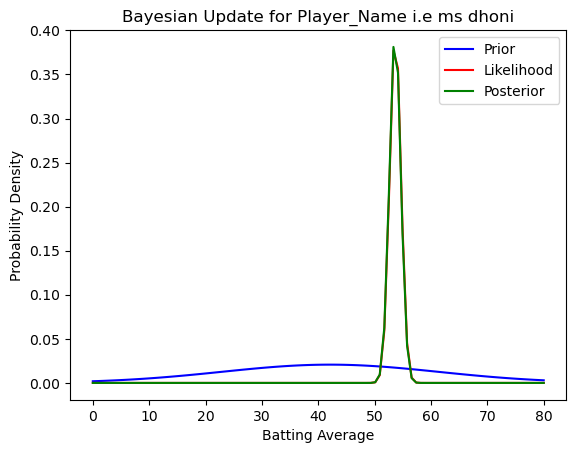

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/home/abantika/Documents/abantika_projects/IPL/IPL1_cleaned_final_proper.csv")

# Select batting statistics
batting_stats = df[["Player_Name", "Year", "Runs_Scored", "Batting_Average"]]

# Convert "Player_Name" column to lowercase to ensure case-insensitive indexing
batting_stats["Player_Name"] = batting_stats["Player_Name"].str.lower()

# Compute Prior (historical averages and standard deviation)
# If std is 0, then there is no variation in data
# groupby("Player_Name") automatically makes "Player_Name" as the index
prior_mu = batting_stats.groupby("Player_Name")["Batting_Average"].mean().fillna(0)  # Fill NaN values
prior_sigma = batting_stats.groupby("Player_Name")["Batting_Average"].std().fillna(1)  # Avoid zero deviation

# Convert indexes to lowercase for case-insensitive lookup
prior_mu.index = prior_mu.index.str.lower()
prior_sigma.index = prior_sigma.index.str.lower()

# Get latest season data
recent_stats = df[df["Year"] == df["Year"].max()]

# Convert "Player_Name" column to lowercase in recent_stats
recent_stats["Player_Name"] = recent_stats["Player_Name"].str.lower()

# Compute observed batting average (likelihood)
observed_mu = recent_stats.groupby("Player_Name")["Batting_Average"].mean().fillna(0)
observed_sigma = recent_stats.groupby("Player_Name")["Batting_Average"].std().fillna(1)

# Convert indexes to lowercase for case-insensitive lookup
observed_mu.index = observed_mu.index.str.lower()
observed_sigma.index = observed_sigma.index.str.lower()

# Compute Posterior Mean & Standard Deviation (Bayes' Theorem for New belief)
posterior_mu = (prior_mu/prior_sigma**2 + observed_mu/observed_sigma**2) / (1/prior_sigma**2 + 1/observed_sigma**2)
posterior_sigma = np.sqrt(1 / (1/prior_sigma**2 + 1/observed_sigma**2))

# Example Player (Case Insensitive Lookup)
example_player = "Ms Dhoni".lower()  # Convert user input to lowercase

# Ensure player exists before plotting
if example_player in prior_mu.index and example_player in observed_mu.index:
    # Generate x values for plotting
    x = np.linspace(0, 80, 100)
    
    # Compute distributions
    prior_distribution = stats.norm.pdf(x, prior_mu[example_player], prior_sigma[example_player])
    likelihood_distribution = stats.norm.pdf(x, observed_mu[example_player], observed_sigma[example_player])
    posterior_distribution = stats.norm.pdf(x, posterior_mu[example_player], posterior_sigma[example_player])

    # Plot Bayesian update process
    plt.plot(x, prior_distribution, label="Prior", color="blue")
    plt.plot(x, likelihood_distribution, label="Likelihood", color="red")
    plt.plot(x, posterior_distribution, label="Posterior", color="green")
    plt.xlabel("Batting Average")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.title("Bayesian Update for" + " " + "Player_Name i.e" + " " + example_player)
    plt.show()
else:
    # Print using string concatenation without .format and f-string usage
    print("The Player Name i.e" + " " + example_player + " " + "is not found in the dataset.")
